In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use(['seaborn-v0_8','voresStyle.mplstyle'])
from scipy.stats import sem
from sklearn.utils import resample

In [12]:
# Load data
predictions = np.load('../results/class-eval-100-1000-step50-ts/all_predictions.npy')
actual_labels = np.load('../results/class-eval-100-1000-step50-ts/all_actual_labels.npy')
t_samples = np.load('../results/class-eval-100-1000-step50-ts/all_t_samples.npy')

# Calculate accuracy
correct_predictions = predictions== actual_labels
accuracy = np.mean(correct_predictions, axis=0)
print(accuracy)

0.9291869128603822


In [13]:
np.sum(actual_labels)

79680

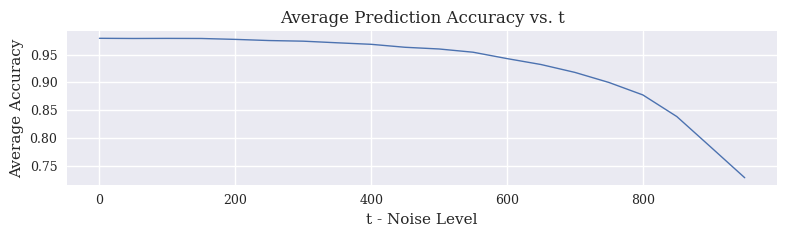

In [14]:
# Find unique time steps
unique_timesteps = np.unique(t_samples)

# Calculate average accuracy for each unique time step
average_accuracy = []
for timestep in unique_timesteps:
    indices = np.where(t_samples == timestep)[0]
    timestep_accuracy = np.mean(correct_predictions[indices])
    average_accuracy.append(timestep_accuracy)

# Plot average accuracy versus t
plt.figure(figsize=(8, 2.5))
plt.plot(unique_timesteps, average_accuracy)
plt.xlabel('t - Noise Level')
plt.ylabel('Average Accuracy')
plt.title('Average Prediction Accuracy vs. t')
plt.grid(True)
plt.tight_layout()
plt.savefig('../results/average_accuracy_vs_t.pdf')
plt.show()

Confusion Matrix:
[[40726  3074]
 [ 5670 74010]]


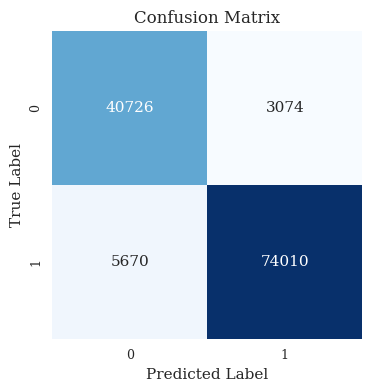

In [22]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(actual_labels, predictions)

print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

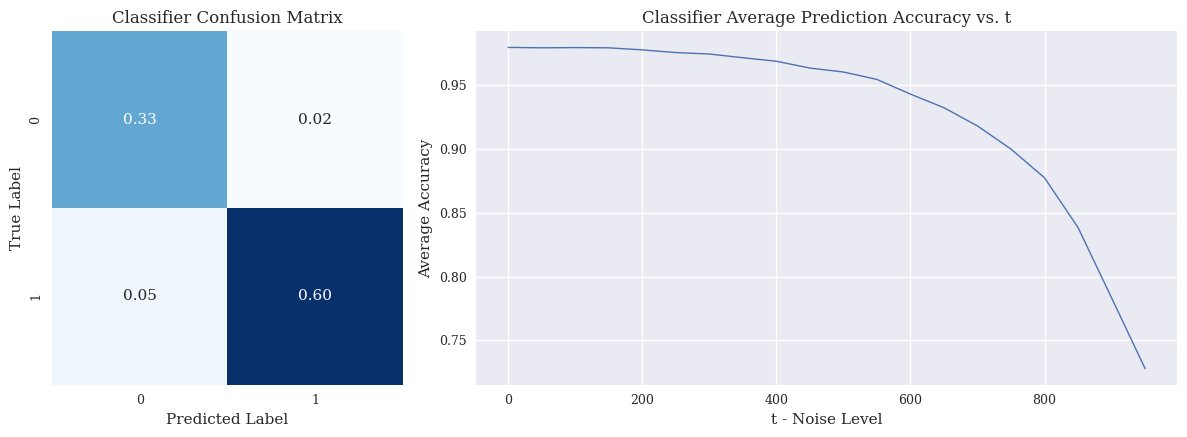

In [32]:
from matplotlib.ticker import FuncFormatter

# Plot both confusion matrix and average accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.5), gridspec_kw={'width_ratios': [1, 2]})

# Plot confusion matrix
conf_matrix = confusion_matrix(actual_labels, predictions)/len(actual_labels)
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", cbar=False, ax=ax1)
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')
ax1.set_title('Classifier Confusion Matrix')

# Plot average accuracy over timesteps
ax2.plot(unique_timesteps, average_accuracy)
ax2.set_xlabel('t - Noise Level')
ax2.set_ylabel('Average Accuracy')
ax2.set_title('Classifier Average Prediction Accuracy vs. t')
ax2.grid(True)

plt.tight_layout()
plt.savefig('../results/confusion_matrix_and_average_accuracy_vs_t.pdf')
plt.show()

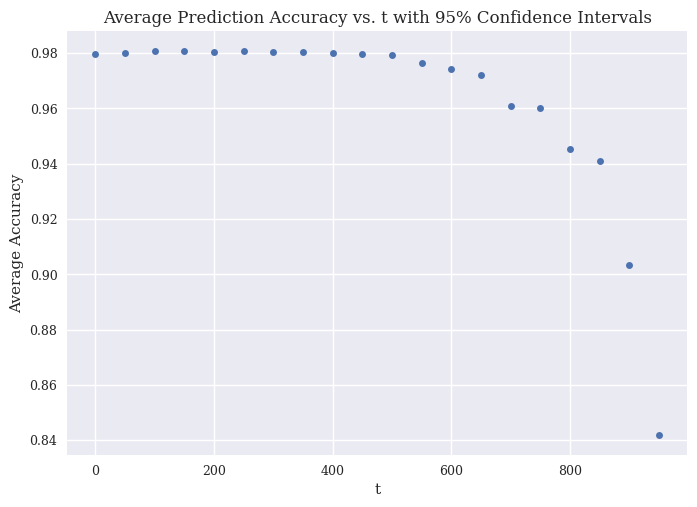

In [4]:
# Find unique time steps
unique_timesteps = np.unique(t_samples)

# Bootstrap resampling and calculate confidence intervals
num_bootstraps = 1000
bootstrap_accuracies = []
for timestep in unique_timesteps:
    indices = np.where(t_samples == timestep)[0]
    timestep_accuracies = correct_predictions[indices]

    # Perform bootstrapping
    bootstrap_means = []
    for _ in range(num_bootstraps):
        bootstrap_sample = resample(timestep_accuracies)
        bootstrap_means.append(np.mean(bootstrap_sample))

    # Calculate confidence interval (assuming 95% confidence level)
    conf_interval = 1.96 * sem(bootstrap_means)  # 1.96 is the z-value for 95% confidence interval
    lower_bound = np.mean(bootstrap_means) - conf_interval
    upper_bound = np.mean(bootstrap_means) + conf_interval
    bootstrap_accuracies.append((np.mean(bootstrap_means), lower_bound, upper_bound))

# Extract the means, lower bounds, and upper bounds
means = np.array([x[0] for x in bootstrap_accuracies])
lower_bounds = np.array([x[1] for x in bootstrap_accuracies])
upper_bounds = np.array([x[2] for x in bootstrap_accuracies])

# Plot average accuracy with confidence intervals versus t
plt.errorbar(unique_timesteps, means, yerr=[means - lower_bounds, upper_bounds - means], fmt='o')
plt.xlabel('t')
plt.ylabel('Average Accuracy')
plt.title('Average Prediction Accuracy vs. t with 95% Confidence Intervals')
plt.grid(True)
plt.show()

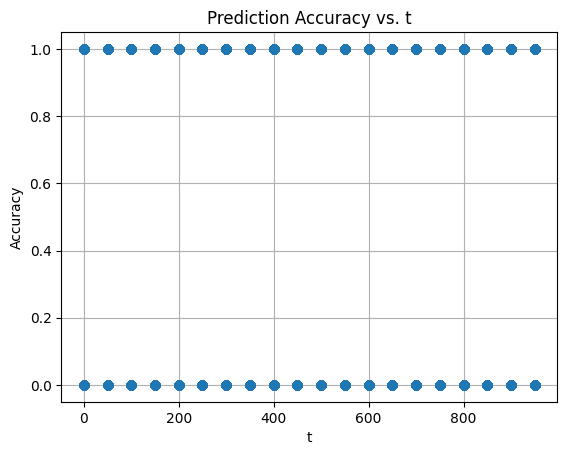

In [17]:
# Plot accuracy average accuracy versus t

plt.plot(t_samples, correct_predictions, 'o')
plt.xlabel('t')
plt.ylabel('Accuracy')
plt.title('Prediction Accuracy vs. t')
plt.grid(True)
plt.show()